Model Building

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, figure, show
from matplotlib import pyplot, pylab
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.svm import SVC

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("MCI_2014_to_2019.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206435 entries, 0 to 206434
Data columns (total 29 columns):
X                      206435 non-null float64
Y                      206435 non-null float64
Index_                 206435 non-null int64
event_unique_id        206435 non-null object
occurrencedate         206435 non-null object
reporteddate           206435 non-null object
premisetype            206435 non-null object
ucr_code               206435 non-null int64
ucr_ext                206435 non-null int64
offence                206435 non-null object
reportedyear           206435 non-null int64
reportedmonth          206435 non-null object
reportedday            206435 non-null int64
reporteddayofyear      206435 non-null int64
reporteddayofweek      206435 non-null object
reportedhour           206435 non-null int64
occurrenceyear         206376 non-null float64
occurrencemonth        206376 non-null object
occurrenceday          206376 non-null float64
occurrencedayofyea

In [7]:
#df=df.drop(['event_unique_id','reporteddate','reportedyear','reportedmonth','reportedday','reporteddayofyear','reporteddayofweek','reportedhour'],axis=1)

In [8]:
#df=df.drop(['Index_'],axis=1)

In [5]:
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,227.0,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,228.0,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,330.0,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005


In [6]:
df = pd.read_csv('MCI_2014_to_2019.csv',sep=',') 
df = df.drop(df[df['occurrenceyear'] < 2014].index)
data_org = df.iloc[:,[22,6,17,20,21,25]]
data_org = data_org.dropna()
data_org.head()

,MCI,premisetype,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood
0,Assault,Commercial,December,Friday,3,University (79)
1,Assault,Commercial,August,Saturday,21,Tam O'Shanter-Sullivan (118)
2,Break and Enter,Apartment,August,Sunday,16,Woburn (137)
3,Break and Enter,Other,November,Thursday,13,Centennial Scarborough (133)
4,Assault,Commercial,December,Friday,19,Taylor-Massey (61)


In [9]:
data = data_org.copy()
# Get one hot encoding of columns premisetype
one_hot = pd.get_dummies(data['premisetype'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns occurrencemonth
one_hot = pd.get_dummies(data['occurrencemonth'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns occurrencedayofweek
one_hot = pd.get_dummies(data['occurrencedayofweek'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns occurrencehour
one_hot = pd.get_dummies(data['occurrencehour'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns Neighbourhood
one_hot = pd.get_dummies(data['Neighbourhood'])
# Join the encoded df
data = data.join(one_hot)

# Set column Neighbourhood as target
data = data.drop('premisetype',axis = 1)
data = data.drop('occurrencemonth',axis = 1)
data = data.drop('Neighbourhood',axis = 1)
data = data.drop('occurrencedayofweek',axis = 1)
data = data.drop('occurrencehour',axis = 1)

In [12]:
# Target selection
y = data['MCI']
data = data.drop('MCI',axis = 1)
# Features selection
X = data[data.columns[:]]  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [29]:
clf = RandomForestClassifier(n_estimators=50, max_depth = 25, criterion = 'gini')

#Train the model using the training sets.
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_training = clf.predict(X_train)

In [30]:
print("Testing Accuracy:", round(metrics.accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Training Accuracy:", round(metrics.accuracy_score(y_train, y_training)* 100, 2), "%\n")
print( 'Classification report: \n', metrics.classification_report(y_test, y_pred), "\n")

Testing Accuracy: 60.16 %
Training Accuracy: 63.77 %

Classification report: 
                  precision    recall  f1-score   support

        Assault       0.60      0.93      0.73     33148
     Auto Theft       0.67      0.13      0.22      7154
Break and Enter       0.61      0.40      0.48     12822
        Robbery       0.69      0.01      0.03      6487
     Theft Over       0.33      0.00      0.00      1986

       accuracy                           0.60     61597
      macro avg       0.58      0.30      0.29     61597
   weighted avg       0.61      0.60      0.52     61597
 



In [90]:


# hyperparameter tuning
param_grid = {   'n_estimators': [20, 30, 50], 
                 'max_depth': [10, 15, 20, 25],
             }

grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_



{'max_depth': 25, 'n_estimators': 50}

In [70]:
#Building a Random Forest after tuning

clf_rf = RandomForestClassifier(n_estimators=80, max_depth = 20, criterion = 'gini')

#Train the model using the training sets.
clf_rf.fit(X_train,y_train)

y_pred_kn = clf_rf.predict(X_test)
y_training_kn = clf_rf.predict(X_train)

In [71]:
print("Testing Accuracy:", round(metrics.accuracy_score(y_test, y_pred_kn) * 100, 2), "%")
print("Training Accuracy:", round(metrics.accuracy_score(y_train, y_training_kn)* 100, 2), "%\n")
print( 'Classification report: \n', metrics.classification_report(y_test, y_pred_kn), "\n")

Testing Accuracy: 59.29 %
Training Accuracy: 61.16 %

Classification report: 
                  precision    recall  f1-score   support

        Assault       0.59      0.94      0.72     33148
     Auto Theft       0.67      0.10      0.18      7154
Break and Enter       0.61      0.36      0.45     12822
        Robbery       0.58      0.00      0.00      6487
     Theft Over       0.00      0.00      0.00      1986

       accuracy                           0.59     61597
      macro avg       0.49      0.28      0.27     61597
   weighted avg       0.58      0.59      0.51     61597
 



In [72]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(clf_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [41]:
logisticRegr = LogisticRegression()
clf_log=logisticRegr.fit(X_train, y_train)

In [43]:
#score = logisticRegr.score(X_test, y_test)
#y_pred_log = clf_log.predict(X_test)
#y_training_log = clf.predict(X_train)

In [44]:
#print("Testing Accuracy:", round(metrics.accuracy_score(y_test, y_pred_log) * 100, 2), "%")
#print("Training Accuracy:", round(metrics.accuracy_score(y_train, y_training_log)* 100, 2), "%\n")
#print( 'Classification report: \n', metrics.classification_report(y_test, y_pred_log), "\n")

Testing Accuracy: 58.69 %
Training Accuracy: 61.38 %

Classification report: 
                  precision    recall  f1-score   support

        Assault       0.61      0.89      0.72     33148
     Auto Theft       0.49      0.20      0.29      7154
Break and Enter       0.51      0.39      0.44     12822
        Robbery       0.45      0.01      0.02      6487
     Theft Over       0.00      0.00      0.00      1986

       accuracy                           0.59     61597
      macro avg       0.41      0.30      0.29     61597
   weighted avg       0.54      0.59      0.52     61597
 



In [ ]:
#kmeans Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Knn classifier! too slow to load
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
ypred_knn = clf.predict(X_train)
acc = accuracy_score(y_true=y_train, y_pred=ypred_knn)
print('Acc: {:.4f}'.format(acc))

In [ ]:
#Going Bac to the originl dataset for more analysis

In [47]:
data_org.head()

,MCI,premisetype,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood
0,Assault,Commercial,December,Friday,3,University (79)
1,Assault,Commercial,August,Saturday,21,Tam O'Shanter-Sullivan (118)
2,Break and Enter,Apartment,August,Sunday,16,Woburn (137)
3,Break and Enter,Other,November,Thursday,13,Centennial Scarborough (133)
4,Assault,Commercial,December,Friday,19,Taylor-Massey (61)


In [58]:
data_org['MCI'].unique()

array(['Assault', 'Break and Enter', 'Robbery', 'Theft Over',
       'Auto Theft'], dtype=object)

In [13]:
data_org.head()

,MCI,premisetype,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood
0,Assault,Commercial,December,Friday,3,University (79)
1,Assault,Commercial,August,Saturday,21,Tam O'Shanter-Sullivan (118)
2,Break and Enter,Apartment,August,Sunday,16,Woburn (137)
3,Break and Enter,Other,November,Thursday,13,Centennial Scarborough (133)
4,Assault,Commercial,December,Friday,19,Taylor-Massey (61)


In [ ]:
#SCALING

In [12]:
data_org.head()

,MCI,premisetype,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood
0,Assault,Commercial,December,Friday,3,University (79)
1,Assault,Commercial,August,Saturday,21,Tam O'Shanter-Sullivan (118)
2,Break and Enter,Apartment,August,Sunday,16,Woburn (137)
3,Break and Enter,Other,November,Thursday,13,Centennial Scarborough (133)
4,Assault,Commercial,December,Friday,19,Taylor-Massey (61)


In [16]:
y=data_org['MCI']

In [21]:
data_org_=data_org.drop(['MCI'],axis=1)

In [22]:
data_org_.head()

,premisetype,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood
0,Commercial,December,Friday,3,University (79)
1,Commercial,August,Saturday,21,Tam O'Shanter-Sullivan (118)
2,Apartment,August,Sunday,16,Woburn (137)
3,Other,November,Thursday,13,Centennial Scarborough (133)
4,Commercial,December,Friday,19,Taylor-Massey (61)


In [23]:
data_org_=pd.get_dummies(data_org_)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data_org_))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [25]:
data_org_.head()

,occurrencehour,premisetype_Apartment,premisetype_Commercial,premisetype_House,premisetype_Other,premisetype_Outside,occurrencemonth_April,occurrencemonth_August,occurrencemonth_December,occurrencemonth_February,...,Neighbourhood_Willowdale West (37),Neighbourhood_Willowridge-Martingrove-Richview (7),Neighbourhood_Woburn (137),Neighbourhood_Woodbine Corridor (64),Neighbourhood_Woodbine-Lumsden (60),Neighbourhood_Wychwood (94),Neighbourhood_Yonge-Eglinton (100),Neighbourhood_Yonge-St.Clair (97),Neighbourhood_York University Heights (27),Neighbourhood_Yorkdale-Glen Park (31)
0,3,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Target selection
#y = data['MCI']
#data = data.drop('MCI',axis = 1)
# Features selection
X = data_org_[data_org_.columns[:]]  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [28]:
clf = RandomForestClassifier(n_estimators=50, max_depth = 25, criterion = 'gini')

#Train the model using the training sets.
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_training = clf.predict(X_train)

In [29]:
print("Testing Accuracy:", round(metrics.accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Training Accuracy:", round(metrics.accuracy_score(y_train, y_training)* 100, 2), "%\n")
print( 'Classification report: \n', metrics.classification_report(y_test, y_pred), "\n")

Testing Accuracy: 60.23 %
Training Accuracy: 66.19 %

Classification report: 
                  precision    recall  f1-score   support

        Assault       0.61      0.91      0.73     33218
     Auto Theft       0.57      0.15      0.23      7038
Break and Enter       0.59      0.43      0.50     12881
        Robbery       0.45      0.04      0.08      6446
     Theft Over       0.14      0.01      0.01      2014

       accuracy                           0.60     61597
      macro avg       0.47      0.31      0.31     61597
   weighted avg       0.57      0.60      0.53     61597
 



In [ ]:
#Creating models for the top 3 MCI

In [7]:
data_org.head()

,MCI,premisetype,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood
0,Assault,Commercial,December,Friday,3,University (79)
1,Assault,Commercial,August,Saturday,21,Tam O'Shanter-Sullivan (118)
2,Break and Enter,Apartment,August,Sunday,16,Woburn (137)
3,Break and Enter,Other,November,Thursday,13,Centennial Scarborough (133)
4,Assault,Commercial,December,Friday,19,Taylor-Massey (61)


In [13]:
new_mci=['Assault','Auto Theft','Break and Enter']
data_org1=data_org[data_org.MCI.isin(new_mci)]

                   

In [15]:
data_org1.describe

<bound method NDFrame.describe of                     MCI premisetype occurrencemonth occurrencedayofweek  \
0               Assault  Commercial        December          Friday       
1               Assault  Commercial          August          Saturday     
2       Break and Enter   Apartment          August          Sunday       
3       Break and Enter       Other        November          Thursday     
4               Assault  Commercial        December          Friday       
...                 ...         ...             ...                 ...   
206430       Auto Theft     Outside        February          Thursday     
206431       Auto Theft  Commercial        February          Thursday     
206432       Auto Theft       House         January          Wednesday    
206433       Auto Theft  Commercial        February          Thursday     
206434       Auto Theft       House        February          Thursday     

        occurrencehour                         Neighbourhood  
0 

In [17]:
data = data_org1.copy()
# Get one hot encoding of columns premisetype
one_hot = pd.get_dummies(data['premisetype'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns occurrencemonth
one_hot = pd.get_dummies(data['occurrencemonth'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns occurrencedayofweek
one_hot = pd.get_dummies(data['occurrencedayofweek'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns occurrencehour
one_hot = pd.get_dummies(data['occurrencehour'])
# Join the encoded df
data = data.join(one_hot)

# Get one hot encoding of columns Neighbourhood
one_hot = pd.get_dummies(data['Neighbourhood'])
# Join the encoded df
data = data.join(one_hot)

# Set column Neighbourhood as target
data = data.drop('premisetype',axis = 1)
data = data.drop('occurrencemonth',axis = 1)
data = data.drop('Neighbourhood',axis = 1)
data = data.drop('occurrencedayofweek',axis = 1)
data = data.drop('occurrencehour',axis = 1)

In [19]:
#Target selection
y = data['MCI']
data = data.drop('MCI',axis = 1)
# Features selection
X = data[data.columns[:]]  

In [20]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [21]:
clf = RandomForestClassifier(n_estimators=50, max_depth = 25, criterion = 'gini')


In [22]:
clf = RandomForestClassifier(n_estimators=50, max_depth = 25, criterion = 'gini')

#Train the model using the training sets.
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_training = clf.predict(X_train)

In [23]:
print("Testing Accuracy:", round(metrics.accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Training Accuracy:", round(metrics.accuracy_score(y_train, y_training)* 100, 2), "%\n")
print( 'Classification report: \n', metrics.classification_report(y_test, y_pred), "\n")

Testing Accuracy: 69.5 %
Training Accuracy: 73.2 %

Classification report: 
                  precision    recall  f1-score   support

        Assault       0.71      0.92      0.80     33239
     Auto Theft       0.68      0.14      0.24      6920
Break and Enter       0.64      0.40      0.50     12987

       accuracy                           0.70     53146
      macro avg       0.67      0.49      0.51     53146
   weighted avg       0.69      0.70      0.65     53146
 



In [ ]:
#Logistic REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticRegr = LogisticRegression()
clf_log=logisticRegr.fit(X_train, y_train)

In [29]:
score = logisticRegr.score(X_test, y_test)
y_pred_log = clf_log.predict(X_test)
y_training_log = clf.predict(X_train)

In [30]:
print("Testing Accuracy:", round(metrics.accuracy_score(y_test, y_pred_log) * 100, 2), "%")
print("Training Accuracy:", round(metrics.accuracy_score(y_train, y_training_log)* 100, 2), "%\n")
print( 'Classification report: \n', metrics.classification_report(y_test, y_pred_log), "\n")

Testing Accuracy: 68.21 %
Training Accuracy: 73.2 %

Classification report: 
                  precision    recall  f1-score   support

        Assault       0.71      0.88      0.79     33239
     Auto Theft       0.57      0.27      0.37      6920
Break and Enter       0.58      0.40      0.47     12987

       accuracy                           0.68     53146
      macro avg       0.62      0.52      0.54     53146
   weighted avg       0.66      0.68      0.66     53146
 



In [ ]:
#Using LSTM to predict the total crime count per day

In [51]:
df_deep = pd.read_csv('MCI_2014_to_2019.csv',sep=',') 
df_deep = df_deep.drop(df_deep[df_deep['occurrenceyear'] < 2014].index)
df_deep = df_deep.iloc[:,[16,17,18,19,22]]
df_deep.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,MCI
0,2015.0,December,18.0,352.0,Assault
1,2015.0,August,15.0,227.0,Assault
2,2015.0,August,16.0,228.0,Break and Enter
3,2015.0,November,26.0,330.0,Break and Enter
4,2015.0,December,18.0,352.0,Assault


In [52]:
df_deep['month'] = pd.to_datetime(df_deep.occurrencemonth, format='%B').dt.month


In [53]:
df_deep=df_deep.rename(columns = {'occurrenceyear':'year'})
df_deep=df_deep.rename(columns = {'occurrenceday':'day'})

In [54]:
df_deep.head()


,year,occurrencemonth,day,occurrencedayofyear,MCI,month
0,2015.0,December,18.0,352.0,Assault,12.0
1,2015.0,August,15.0,227.0,Assault,8.0
2,2015.0,August,16.0,228.0,Break and Enter,8.0
3,2015.0,November,26.0,330.0,Break and Enter,11.0
4,2015.0,December,18.0,352.0,Assault,12.0


In [55]:
df_deep['Date'] = pd.to_datetime(df_deep[['year', 'month']].assign(Day=1))


In [56]:

df_deep.drop(df_deep.columns[0:4], axis=1, inplace=True)
df_deep.drop(df_deep.columns[1], axis=1, inplace=True)

In [57]:
df_deep.head()


,MCI,Date
0,Assault,2015-12-01
1,Assault,2015-08-01
2,Break and Enter,2015-08-01
3,Break and Enter,2015-11-01
4,Assault,2015-12-01


In [58]:
df_deep = df_deep.groupby('Date')['MCI'].value_counts().reset_index(name='FC')


In [59]:
mci_freq = df_deep.groupby(['Date'], as_index=False)['FC'].sum()


In [60]:
mci_freq.head()

,Date,FC
0,2014-01-01,2448
1,2014-02-01,2203
2,2014-03-01,2420
3,2014-04-01,2509
4,2014-05-01,2856


In [74]:
mci_freq.Date =pd.to_datetime(mci_freq.Date)
data = mci_freq.set_index('Date')

In [75]:
data.head()

,FC
Date,
2014-01-01,2448
2014-02-01,2203
2014-03-01,2420
2014-04-01,2509
2014-05-01,2856


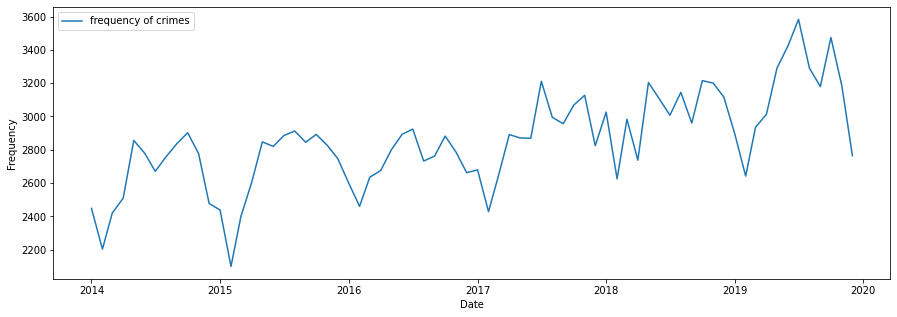

In [76]:
# Create a time series plot.
plt.figure(figsize = (15, 5))
plt.plot(data, label = "frequency of crimes")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [121]:
train, test = data[:-22],data[-22:]


In [122]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

In [123]:
scalar =MinMaxScaler()
scalar.fit(train)
train = scalar.transform(train)
test = scalar.transform(test)

In [124]:
train.shape

(50, 1)

In [125]:
test.shape

(22, 1)

In [126]:
n_input =12
n_features = 1
generator = TimeseriesGenerator(train, train, n_input, batch_size =6)

In [127]:
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(200, activation= 'relu', input_shape =(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adagrad', loss='mse')
model.fit_generator(generator, epochs =180)

Epoch 1/180
7/7 [==============================] - 0s 61ms/step - loss: 0.6948
Epoch 2/180
7/7 [==============================] - 0s 18ms/step - loss: 0.0955
Epoch 3/180
7/7 [==============================] - 0s 18ms/step - loss: 0.0672
Epoch 4/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0537
Epoch 5/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0442
Epoch 6/180
7/7 [==============================] - 0s 18ms/step - loss: 0.0387
Epoch 7/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0337
Epoch 8/180
7/7 [==============================] - 0s 16ms/step - loss: 0.0426
Epoch 9/180
7/7 [==============================] - 0s 20ms/step - loss: 0.0385
Epoch 10/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0362
Epoch 11/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0332
Epoch 12/180
7/7 [==============================] - 0s 19ms/step - loss: 0.0355
Epoch 13/180
7/7 [==============================]

7/7 [==============================] - 0s 19ms/step - loss: 0.0235
Epoch 104/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0210
Epoch 105/180
7/7 [==============================] - 0s 15ms/step - loss: 0.0233
Epoch 106/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0239
Epoch 107/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0234
Epoch 108/180
7/7 [==============================] - 0s 16ms/step - loss: 0.0195
Epoch 109/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0196
Epoch 110/180
7/7 [==============================] - 0s 18ms/step - loss: 0.0195
Epoch 111/180
7/7 [==============================] - 0s 16ms/step - loss: 0.0253
Epoch 112/180
7/7 [==============================] - 0s 19ms/step - loss: 0.0195
Epoch 113/180
7/7 [==============================] - 0s 20ms/step - loss: 0.0181
Epoch 114/180
7/7 [==============================] - 0s 17ms/step - loss: 0.0189
Epoch 115/180
7/7 [=======================

In [128]:
pred_list =[]
batch = train[-n_input:].reshape(1, n_input, n_features)
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

In [129]:
df_predict= pd.DataFrame(scalar.inverse_transform(pred_list), index= data[-n_input:].index, columns =['Predictions'])


In [130]:
df_predict


,Predictions
Date,
2019-01-01,2842.233083
2019-02-01,2982.106128
2019-03-01,2999.511485
2019-04-01,3189.908063
2019-05-01,3384.190461
2019-06-01,3198.059289
2019-07-01,3213.251544
2019-08-01,3317.764412
2019-09-01,3297.886135


In [131]:
df_test = pd.concat([data, df_predict], axis =1)


In [132]:
df_test.tail()


,FC,Predictions
Date,,
2019-08-01,3290,3317.764412
2019-09-01,3179,3297.886135
2019-10-01,3474,3120.322562
2019-11-01,3184,3162.416758
2019-12-01,2764,2939.469759


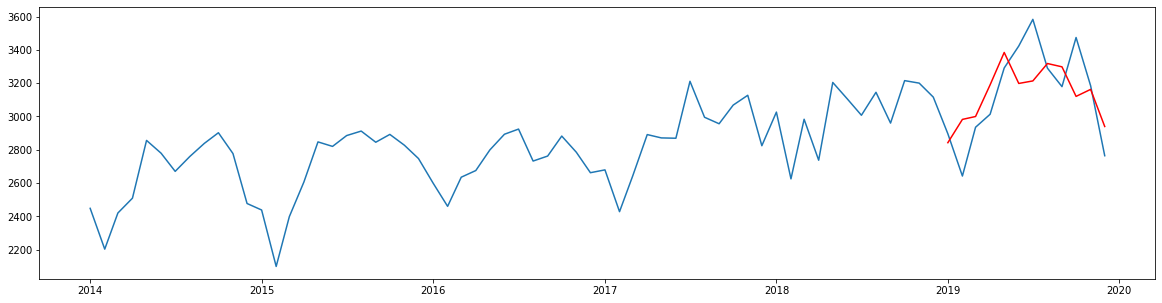

In [133]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['FC'])
plt.plot(df_test.index, df_test['Predictions'], color ='r')